# DATA COLLECTION AND PREPARATION

In [18]:
import re

In [19]:
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.converter import TextConverter
from pdfminer.layout import LAParams
from pdfminer.pdfpage import PDFPage
# from cStringIO import StringIO
from io import StringIO

In [22]:
def convert_pdf_to_txt(path):
    rsrcmgr = PDFResourceManager()
    retstr = StringIO()
    codec = 'utf-8'
    laparams = LAParams()
    device = TextConverter(rsrcmgr, retstr, codec=codec, laparams=laparams)
    # fp = file(path, 'rb')
    fp = open(path, 'rb')
    interpreter = PDFPageInterpreter(rsrcmgr, device)
    password = ""
    maxpages = 0
    caching = True
    pagenos=set()

    for page in PDFPage.get_pages(fp, pagenos, maxpages=maxpages, password=password,caching=caching, check_extractable=True):
        interpreter.process_page(page)

    text = retstr.getvalue()

    fp.close()
    device.close()
    retstr.close()
    return text

In [24]:
lone=convert_pdf_to_txt('legaldocu.pdf')

In [25]:
f=open('xxx.txt','w')
f.write(lone)
f.close()

In [26]:
with open('xxx.txt') as f:
    clean_cont = f.read().splitlines()

In [27]:
clean_cont

['TRADEMARK AND DOMAIN NAME AGREEMENT ',
 '',
 'This agreement (the “Agreement”) is by and between ____________________________ ',
 '',
 '(“Party”) and Eclipse Foundation, Inc. (“Eclipse”) and is effective as of [______] [_____],  ',
 '201[__] (the “Effective Date”). ',
 '',
 'WHEREAS, Party is the owner of certain trademarks identified in Exhibit A (the ',
 '',
 '“Trademarks”) and of certain domain names identified in Exhibit A (the “Domain Names”); ',
 '',
 'WHEREAS, Party is desirous of Eclipse to initiate a project or working group with a ',
 '',
 'name based on the Trademark (the “Project Initiation”); ',
 '',
 'WHEREAS, to accommodate the Project Initiation, Party desires to transfer all of Party’s ',
 '',
 'rights, title and interest in and to the Trademarks to Eclipse and to thereafter have certain ',
 'continuing usage rights of the Trademarks; ',
 '',
 'WHEREAS, to accommodate the Project Initiation, the Parties may mutually agree to ',
 'have any related Domain Names initial

In [28]:
shear=[i.replace('\xe2\x80\x9c','') for i in clean_cont ]
shear=[i.replace('\xe2\x80\x9d','') for i in shear ]
shear=[i.replace('\xe2\x80\x99s','') for i in shear ]

shears = [x for x in shear if x != ' ']
shearss = [x for x in shears if x != '']

In [29]:
shear

['TRADEMARK AND DOMAIN NAME AGREEMENT ',
 '',
 'This agreement (the “Agreement”) is by and between ____________________________ ',
 '',
 '(“Party”) and Eclipse Foundation, Inc. (“Eclipse”) and is effective as of [______] [_____],  ',
 '201[__] (the “Effective Date”). ',
 '',
 'WHEREAS, Party is the owner of certain trademarks identified in Exhibit A (the ',
 '',
 '“Trademarks”) and of certain domain names identified in Exhibit A (the “Domain Names”); ',
 '',
 'WHEREAS, Party is desirous of Eclipse to initiate a project or working group with a ',
 '',
 'name based on the Trademark (the “Project Initiation”); ',
 '',
 'WHEREAS, to accommodate the Project Initiation, Party desires to transfer all of Party’s ',
 '',
 'rights, title and interest in and to the Trademarks to Eclipse and to thereafter have certain ',
 'continuing usage rights of the Trademarks; ',
 '',
 'WHEREAS, to accommodate the Project Initiation, the Parties may mutually agree to ',
 'have any related Domain Names initial

In [30]:
shears

['TRADEMARK AND DOMAIN NAME AGREEMENT ',
 '',
 'This agreement (the “Agreement”) is by and between ____________________________ ',
 '',
 '(“Party”) and Eclipse Foundation, Inc. (“Eclipse”) and is effective as of [______] [_____],  ',
 '201[__] (the “Effective Date”). ',
 '',
 'WHEREAS, Party is the owner of certain trademarks identified in Exhibit A (the ',
 '',
 '“Trademarks”) and of certain domain names identified in Exhibit A (the “Domain Names”); ',
 '',
 'WHEREAS, Party is desirous of Eclipse to initiate a project or working group with a ',
 '',
 'name based on the Trademark (the “Project Initiation”); ',
 '',
 'WHEREAS, to accommodate the Project Initiation, Party desires to transfer all of Party’s ',
 '',
 'rights, title and interest in and to the Trademarks to Eclipse and to thereafter have certain ',
 'continuing usage rights of the Trademarks; ',
 '',
 'WHEREAS, to accommodate the Project Initiation, the Parties may mutually agree to ',
 'have any related Domain Names initial

In [31]:
shearss

['TRADEMARK AND DOMAIN NAME AGREEMENT ',
 'This agreement (the “Agreement”) is by and between ____________________________ ',
 '(“Party”) and Eclipse Foundation, Inc. (“Eclipse”) and is effective as of [______] [_____],  ',
 '201[__] (the “Effective Date”). ',
 'WHEREAS, Party is the owner of certain trademarks identified in Exhibit A (the ',
 '“Trademarks”) and of certain domain names identified in Exhibit A (the “Domain Names”); ',
 'WHEREAS, Party is desirous of Eclipse to initiate a project or working group with a ',
 'name based on the Trademark (the “Project Initiation”); ',
 'WHEREAS, to accommodate the Project Initiation, Party desires to transfer all of Party’s ',
 'rights, title and interest in and to the Trademarks to Eclipse and to thereafter have certain ',
 'continuing usage rights of the Trademarks; ',
 'WHEREAS, to accommodate the Project Initiation, the Parties may mutually agree to ',
 'have any related Domain Names initially redirect to a URL designated by Eclipse an

In [32]:
dubby=[re.sub("[^a-zA-Z]+", " ", s) for s in shearss]

In [33]:
dubby

['TRADEMARK AND DOMAIN NAME AGREEMENT ',
 'This agreement the Agreement is by and between ',
 ' Party and Eclipse Foundation Inc Eclipse and is effective as of ',
 ' the Effective Date ',
 'WHEREAS Party is the owner of certain trademarks identified in Exhibit A the ',
 ' Trademarks and of certain domain names identified in Exhibit A the Domain Names ',
 'WHEREAS Party is desirous of Eclipse to initiate a project or working group with a ',
 'name based on the Trademark the Project Initiation ',
 'WHEREAS to accommodate the Project Initiation Party desires to transfer all of Party s ',
 'rights title and interest in and to the Trademarks to Eclipse and to thereafter have certain ',
 'continuing usage rights of the Trademarks ',
 'WHEREAS to accommodate the Project Initiation the Parties may mutually agree to ',
 'have any related Domain Names initially redirect to a URL designated by Eclipse and that the ',
 'Domain Names are subsequently transferred to Eclipse ',
 'In consideration of 

# TOPIC MODELLING

In [34]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pandas as pd
import numpy as np
%pylab
%matplotlib inline


Using matplotlib backend: module://matplotlib_inline.backend_inline
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


C:\Users\rupes\AppData\Roaming\Python\Python312\site-packages\IPython\core\magics\pylab.py:166: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [35]:
# from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

In [36]:
vect=CountVectorizer(ngram_range=(1,1),stop_words='english')

In [37]:
dtm=vect.fit_transform(dubby)

In [38]:
dtm

<171x326 sparse matrix of type '<class 'numpy.int64'>'
	with 647 stored elements in Compressed Sparse Row format>

In [39]:
# pd.DataFrame(dtm.toarray(),columns=vect.get_feature_names())
pd.DataFrame(dtm.toarray(), columns=vect.get_feature_names_out())

,accommodate,accordance,acknowledged,action,actions,additional,address,advised,affiliated,aggrieved,...,warrants,warranty,way,whereof,witness,working,writing,written,www,york
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
167,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
168,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
169,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
lda=LatentDirichletAllocation(n_components=5)

In [41]:
lda.fit_transform(dtm)

array([[0.05345651, 0.05008644, 0.0510005 , 0.79454179, 0.05091477],
       [0.73233681, 0.06666769, 0.06725983, 0.06706817, 0.0666675 ],
       [0.03345937, 0.03338248, 0.86572585, 0.03396252, 0.03346978],
       [0.06667013, 0.06667084, 0.06824533, 0.73174358, 0.06667013],
       [0.02874239, 0.02892255, 0.17077197, 0.02871622, 0.74284688],
       [0.02228683, 0.02225274, 0.02231953, 0.02233302, 0.91080788],
       [0.02509477, 0.0250297 , 0.89953659, 0.0252999 , 0.02503904],
       [0.04037386, 0.04005454, 0.0403517 , 0.83917479, 0.04004512],
       [0.0253399 , 0.02505443, 0.8988339 , 0.02576819, 0.02500357],
       [0.03398018, 0.31165542, 0.03457472, 0.03369303, 0.58609665],
       [0.04037456, 0.83835516, 0.04042701, 0.04009624, 0.04074703],
       [0.88418055, 0.02860921, 0.02915762, 0.02947697, 0.02857565],
       [0.02250553, 0.02235027, 0.90961784, 0.02261774, 0.02290862],
       [0.03352232, 0.03333611, 0.03400996, 0.03356325, 0.86556837],
       [0.03333934, 0.03334107, 0.

In [42]:
lda_dtf=lda.fit_transform(dtm)

In [43]:
import numpy as np
sorting=np.argsort(lda.components_)[:,::-1]
features = np.array(vect.get_feature_names_out())

In [44]:
import mglearn
mglearn.tools.print_topics(topics=range(5), feature_names=features,
sorting=sorting, topics_per_chunk=5, n_words=10)

topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
agreement     parties       trademarks    party         eclipse       
party         warranties    parties       assignment    title         
shall         shall         trademark     trademarks    rights        
condition     agreement     agreement     page          party         
term          contractors   domain        eclipse       trademarks    
waiver        independent   names         right         right         
date          constitute    eclipse       names         domain        
use           implied       ownership     domain        guidelines    
eclipse       respect       necessary     shall         project       
related       dated         promptly      transfer      including     




In [45]:
Agreement_Topic = np.argsort(lda_dtf[:, 2])[::-1]
for i in Agreement_Topic[:4]:
    print(".".join(dubby[i].split(".")[:2]) + ".\n")

business symbolized by use of the Trademarks and the right to sue third parties for and recover .

any official of any other country empowered to issue trademark registrations to record this .

IN WITNESS WHEREOF the parties hereto have each caused this Agreement to be executed by .

to promptly assign ownership of the Trademarks to Eclipse in accordance with the terms of this .



In [46]:
Domain_Name_Topic = np.argsort(lda_dtf[:, 4])[::-1]
for i in Domain_Name_Topic[:4]:
    print(".".join(dubby[i].split(".")[:2]) + ".\n")

http www eclipse org legal logo guidelines php as may be amended from time to time the .

mail return receipt requested postage prepaid to a party at the address set .

any rights title or interests inconsistent with the rights title and interests assigned herein .

name registrars as may be necessary to vest in and secure unto Eclipse the full right title and .



In [47]:
import nltk
nltk.download('punkt', download_dir='C:/nltk_data')  # Change the path as needed

[nltk_data] Downloading package punkt to C:/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [48]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rupes\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [49]:
#  lda wala
import re
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.converter import TextConverter
from pdfminer.layout import LAParams
from pdfminer.pdfpage import PDFPage
from io import StringIO
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from rouge_score import rouge_scorer
import numpy as np

# Function to convert PDF to text
def convert_pdf_to_txt(path):
    rsrcmgr = PDFResourceManager()
    retstr = StringIO()
    codec = 'utf-8'
    laparams = LAParams()
    device = TextConverter(rsrcmgr, retstr, codec=codec, laparams=laparams)
    fp = open(path, 'rb')
    interpreter = PDFPageInterpreter(rsrcmgr, device)
    
    for page in PDFPage.get_pages(fp, check_extractable=True):
        interpreter.process_page(page)
    
    text = retstr.getvalue()
    fp.close()
    device.close()
    retstr.close()
    return text

# Extract text from PDF
lone = convert_pdf_to_txt('legaldocu.pdf')

# Clean the extracted text
clean_cont = lone.splitlines()
shear = [i.replace('\xe2\x80\x9c','').replace('\xe2\x80\x9d','').replace('\xe2\x80\x99s','') for i in clean_cont]
shears = [x for x in shear if x.strip()]
dubby = [re.sub("[^a-zA-Z]+", " ", s) for s in shears]

# Topic Modeling
vect = CountVectorizer(stop_words='english')
dtm = vect.fit_transform(dubby)
lda = LatentDirichletAllocation(n_components=5)
lda_dtf = lda.fit_transform(dtm)
sorting = np.argsort(lda.components_)[:, ::-1]
features = np.array(vect.get_feature_names_out())

# Summarize based on topics
Agreement_Topic = np.argsort(lda_dtf[:, 2])[::-1]
summary = " ".join([".".join(dubby[i].split(".")[:2]) + "." for i in Agreement_Topic[:4]])

# Calculate ROUGE score
def evaluate_summary(reference_text, generated_summary):
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
    scores = scorer.score(reference_text, generated_summary)
    return scores

# Provide reference text (original content) and generated summary
reference_text = " ".join(dubby)  # Full cleaned document text as reference
generated_summary = summary

# Get ROUGE scores
rouge_scores = evaluate_summary(reference_text, generated_summary)

# Display Results
print("Generated Summary:\n", generated_summary)
print("\nROUGE Scores:\n", rouge_scores)


Generated Summary:
 Domain Names including all sub domains and related URLs to redirect directly to the URLs . have any related Domain Names initially redirect to a URL designated by Eclipse and that the . other legal representatives as fully and entirely as the same would have been held and enjoyed . damages from future infringement of the Trademarks the same to be held and enjoyed by .

ROUGE Scores:
 {'rouge1': Score(precision=1.0, recall=0.04518950437317784, fmeasure=0.08647140864714087), 'rouge2': Score(precision=0.9672131147540983, recall=0.043034281546316555, fmeasure=0.0824022346368715), 'rougeL': Score(precision=0.7903225806451613, recall=0.03571428571428571, fmeasure=0.06834030683403068)}


In [50]:
import re
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.converter import TextConverter
from pdfminer.layout import LAParams
from pdfminer.pdfpage import PDFPage
from io import StringIO
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD
from rouge_score import rouge_scorer
import numpy as np

# Function to convert PDF to text
def convert_pdf_to_txt(path):
    rsrcmgr = PDFResourceManager()
    retstr = StringIO()
    codec = 'utf-8'
    laparams = LAParams()
    device = TextConverter(rsrcmgr, retstr, codec=codec, laparams=laparams)
    fp = open(path, 'rb')
    interpreter = PDFPageInterpreter(rsrcmgr, device)
    
    for page in PDFPage.get_pages(fp, check_extractable=True):
        interpreter.process_page(page)
    
    text = retstr.getvalue()
    fp.close()
    device.close()
    retstr.close()
    return text

# Extract text from PDF
lone = convert_pdf_to_txt('legaldocu.pdf')

# Clean the extracted text
clean_cont = lone.splitlines()
shear = [i.replace('\xe2\x80\x9c','').replace('\xe2\x80\x9d','').replace('\xe2\x80\x99s','') for i in clean_cont]
shears = [x for x in shear if x.strip()]
dubby = [re.sub("[^a-zA-Z]+", " ", s) for s in shears]

# Initialize vectorizer and evaluate_summary function
vect = CountVectorizer(stop_words='english')
dtm = vect.fit_transform(dubby)

def evaluate_summary(reference_text, generated_summary):
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
    scores = scorer.score(reference_text, generated_summary)
    return scores

# Optimize number of topics based on ROUGE score
best_topic_num = 0
best_rouge_score = 0
best_summary = ""

# Define reference text for ROUGE scoring
reference_text = " ".join(dubby)  # Full cleaned document text as reference

# Store results for all topic numbers
results = []

for n_topics in range(10, 20):  # Range for the number of topics
    lsa = TruncatedSVD(n_components=n_topics)
    lsa_dtf = lsa.fit_transform(dtm)
    
    # Summarize based on topics
    Agreement_Topic = np.argsort(lsa_dtf[:, 0])[::-1]
    summary = " ".join([".".join(dubby[i].split(".")[:2]) + "." for i in Agreement_Topic[:4]])
    
    # Calculate ROUGE score
    rouge_scores = evaluate_summary(reference_text, summary)
    rouge_score = rouge_scores['rouge1'].fmeasure
    
    # Store results
    results.append((n_topics, rouge_score))
    
    # Update best summary if current score is highest
    if rouge_score > best_rouge_score:
        best_rouge_score = rouge_score
        best_topic_num = n_topics
        best_summary = summary

# Print ROUGE scores for each topic count
for topic_num, score in results:
    print(f"For {topic_num} topics, ROUGE-1 F-measure score is: {score:.4f}")

# Display best results
print(f"\nOptimal number of topics: {best_topic_num}")
print("Best Generated Summary:\n", best_summary)
print("\nBest ROUGE-1 F-measure Score:\n", best_rouge_score)


For 10 topics, ROUGE-1 F-measure score is: 0.0891
For 11 topics, ROUGE-1 F-measure score is: 0.0891
For 12 topics, ROUGE-1 F-measure score is: 0.0891
For 13 topics, ROUGE-1 F-measure score is: 0.0891
For 14 topics, ROUGE-1 F-measure score is: 0.0891
For 15 topics, ROUGE-1 F-measure score is: 0.0891
For 16 topics, ROUGE-1 F-measure score is: 0.0891
For 17 topics, ROUGE-1 F-measure score is: 0.0891
For 18 topics, ROUGE-1 F-measure score is: 0.0891
For 19 topics, ROUGE-1 F-measure score is: 0.0891

Optimal number of topics: 10
Best Generated Summary:
 Date Party shall transfer to Eclipse Party s entire right title and interest to the Domain Names . Party s ownership of the Trademarks has not been perfected by the Effective Date Party agrees . Eclipse all of Party s right title and interest in and to the Trademarks including all common . WHEREAS to accommodate the Project Initiation Party desires to transfer all of Party s .

Best ROUGE-1 F-measure Score:
 0.08913649025069638


In [51]:
# lsa wala

import re
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.converter import TextConverter
from pdfminer.layout import LAParams
from pdfminer.pdfpage import PDFPage
from io import StringIO
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD
from rouge_score import rouge_scorer
import numpy as np

# Function to convert PDF to text
def convert_pdf_to_txt(path):
    rsrcmgr = PDFResourceManager()
    retstr = StringIO()
    codec = 'utf-8'
    laparams = LAParams()
    device = TextConverter(rsrcmgr, retstr, codec=codec, laparams=laparams)
    fp = open(path, 'rb')
    interpreter = PDFPageInterpreter(rsrcmgr, device)
    
    for page in PDFPage.get_pages(fp, check_extractable=True):
        interpreter.process_page(page)
    
    text = retstr.getvalue()
    fp.close()
    device.close()
    retstr.close()
    return text

# Extract text from PDF
lone = convert_pdf_to_txt('legaldocu.pdf')

# Clean the extracted text
clean_cont = lone.splitlines()
shear = [i.replace('\xe2\x80\x9c','').replace('\xe2\x80\x9d','').replace('\xe2\x80\x99s','') for i in clean_cont]
shears = [x for x in shear if x.strip()]
dubby = [re.sub("[^a-zA-Z]+", " ", s) for s in shears]

# Topic Modeling with LSA
vect = CountVectorizer(stop_words='english')
dtm = vect.fit_transform(dubby)
lsa = TruncatedSVD(n_components=5)  # LSA model
lsa_dtf = lsa.fit_transform(dtm)
sorting = np.argsort(lsa.components_)[:, ::-1]
features = np.array(vect.get_feature_names_out())

# Summarize based on topics
Agreement_Topic = np.argsort(lsa_dtf[:, 2])[::-1]
summary = " ".join([".".join(dubby[i].split(".")[:2]) + "." for i in Agreement_Topic[:4]])

# Calculate ROUGE score
def evaluate_summary(reference_text, generated_summary):
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
    scores = scorer.score(reference_text, generated_summary)
    return scores

# Provide reference text (original content) and generated summary
reference_text = " ".join(dubby)  # Full cleaned document text as reference
generated_summary = summary

# Get ROUGE scores
rouge_scores = evaluate_summary(reference_text, generated_summary)

# Display Results
print("Generated Summary:\n", generated_summary)
print("\nROUGE Scores:\n", rouge_scores)


Generated Summary:
 Entire Agreement Upon execution by both parties this Agreement shall . This agreement the Agreement is by and between . required or permitted to be given under this Agreement shall be in writing . this Agreement shall not be construed as a waiver of such rights or of its .

ROUGE Scores:
 {'rouge1': Score(precision=1.0, recall=0.033527696793002916, fmeasure=0.06488011283497884), 'rouge2': Score(precision=0.9333333333333333, recall=0.030634573304157548, fmeasure=0.059322033898305086), 'rougeL': Score(precision=0.8478260869565217, recall=0.028425655976676383, fmeasure=0.05500705218617771)}


# VISUALIZATION OF TOPICS


In [48]:
# from __future__ import  print_function
# import pyLDAvis
# import pyLDAvis.sklearn
# pyLDAvis.enable_notebook()
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

ModuleNotFoundError: No module named 'pyLDAvis.sklearn'

In [46]:
zit=pyLDAvis.sklearn.prepare(lda,dtm,vect)

In [47]:
pyLDAvis.show(zit)


Note: if you're in the IPython notebook, pyLDAvis.show() is not the best command
      to use. Consider using pyLDAvis.display(), or pyLDAvis.enable_notebook().
      See more information at http://pyLDAvis.github.io/quickstart.html .

You must interrupt the kernel to end this command

Serving to http://127.0.0.1:8889/    [Ctrl-C to exit]


127.0.0.1 - - [18/Jan/2018 18:25:30] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [18/Jan/2018 18:25:30] "GET /LDAvis.css HTTP/1.1" 200 -
127.0.0.1 - - [18/Jan/2018 18:25:30] "GET /d3.js HTTP/1.1" 200 -
127.0.0.1 - - [18/Jan/2018 18:25:30] "GET /LDAvis.js HTTP/1.1" 200 -



stopping Server...


# WORDCLOUD

In [48]:
%pylab
%matplotlib inline
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


In [49]:
d = path.dirname(__name__)

In [50]:
text = open(path.join(d, 'xxx.txt')).read()

In [51]:
alice_mask = np.array(Image.open(path.join(d, "Nigeria.png")))

In [52]:
stopwords = set(STOPWORDS)

In [53]:
wc = WordCloud(background_color="black", max_words=2000, mask=alice_mask,stopwords=stopwords)

In [54]:
wc.generate(text)

In [55]:
wc.to_file(path.join(d, "alice.png"))

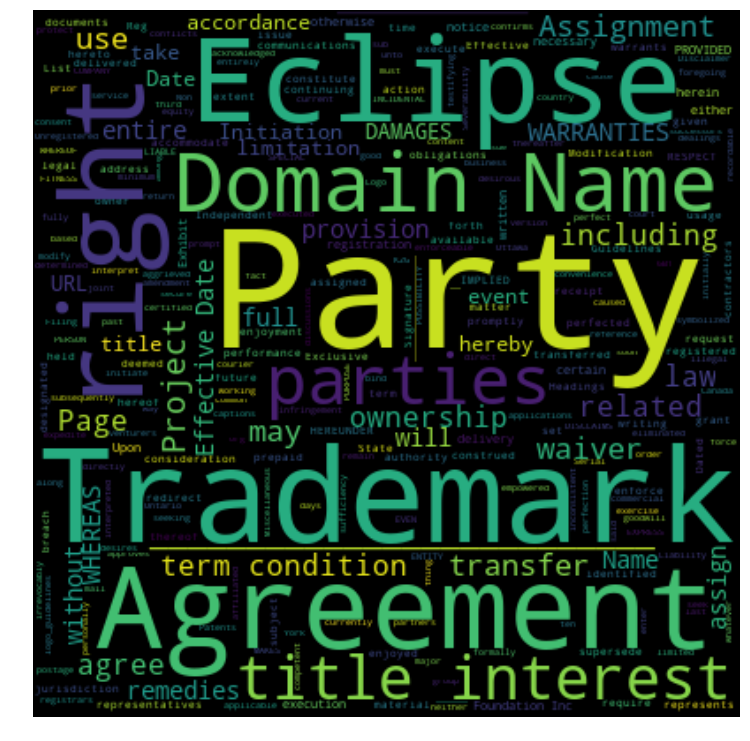

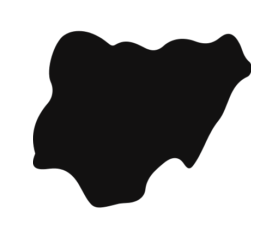

In [59]:
plt.figure(figsize=(16,13))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()